In [110]:
import pandas as pd
import numpy as np
from numpy import nan
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [111]:
data = pd.read_csv("project4.csv")  
data.head(5)

,Loanapp_ID,Sex,Marital_Status,first_name,last_name,email,address,Dependents,Qual_var,SE,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,Prop_Area,INT_ID,Prev_ID,AGT_ID,CPL_Status
0,CPL001002,M,N,Austin,Pennycook,apennycook1@mac.com,007 Miller Road,0,Grad,N,7018.8,0.0,NaN,360.0,1.0,Urban,9694176212,92-247-0058,Mozilla/5.0 (Windows; U; Windows NT 5.1; zh-TW...,Y
1,CPL001003,M,Y,Mareah,Tomanek,mtomanek2@bloomberg.com,145 Charing Cross Junction,1,Grad,N,5499.6,1809.6,153.6,360.0,1.0,Rural,152387684,36-236-3028,Mozilla/5.0 (Windows NT 5.1; rv:21.0) Gecko/20...,N
2,CPL001005,M,Y,Myrna,Rosenthaler,mrosenthaler3@dmoz.org,268 Algoma Hill,0,Grad,Y,3600.0,0.0,79.2,360.0,1.0,Urban,6510396556,34-339-0917,Mozilla/5.0 (Windows; U; Windows NT 6.1; cs-CZ...,Y
3,CPL001006,M,Y,Danyette,Stempe,dstempe4@tumblr.com,571 Stone Corner Park,0,Non Grad,N,3099.6,2829.6,144.0,360.0,1.0,Urban,7141853006,94-098-8902,Mozilla/5.0 (iPhone; U; CPU iPhone OS 4_2_1 li...,Y
4,CPL001008,M,N,Patten,McCathy,pmccathy5@ted.com,118 Moulton Drive,0,Grad,N,7200.0,0.0,169.2,360.0,1.0,Urban,23293411,38-247-1410,Mozilla/5.0 (Windows NT 6.0; WOW64) AppleWebKi...,Y


In [112]:
print(data.dtypes)

Loanapp_ID         object
Sex                object
Marital_Status     object
first_name         object
last_name          object
email              object
address            object
Dependents         object
Qual_var           object
SE                 object
App_Income_1      float64
App_Income_2      float64
CPL_Amount        float64
CPL_Term          float64
Credit_His        float64
Prop_Area          object
INT_ID              int64
Prev_ID            object
AGT_ID             object
CPL_Status         object
dtype: object


In [113]:
print(data.isnull().sum())

Loanapp_ID         0
Sex               13
Marital_Status     3
first_name         0
last_name          0
email              0
address            0
Dependents        15
Qual_var           0
SE                32
App_Income_1       0
App_Income_2       0
CPL_Amount         2
CPL_Term          14
Credit_His        50
Prop_Area          0
INT_ID             0
Prev_ID            0
AGT_ID             0
CPL_Status         0
dtype: int64


In [114]:
print(data['Sex'].value_counts())

M    489
F    112
Name: Sex, dtype: int64


In [115]:
data['Sex'].fillna('M',inplace=True)
print(data['Sex'].value_counts())

M    502
F    112
Name: Sex, dtype: int64


In [116]:
print(data['Marital_Status'].value_counts())

Y    398
N    213
Name: Marital_Status, dtype: int64


In [117]:
data['Marital_Status'].fillna('Y',inplace=True)
print(data['Marital_Status'].value_counts())

Y    401
N    213
Name: Marital_Status, dtype: int64


In [118]:
print(data['Dependents'].value_counts())

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


In [119]:
data['Dependents'].fillna('0', inplace=True)
print(data['Dependents'].value_counts())

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


In [120]:
print(data['SE'].value_counts())

N    500
Y     82
Name: SE, dtype: int64


In [121]:
data['SE'].fillna('N', inplace=True)
print(data['SE'].value_counts())

N    532
Y     82
Name: SE, dtype: int64


In [122]:
print(data['CPL_Amount'].value_counts())

144.0    20
132.0    17
120.0    15
192.0    13
224.4    12
         ..
56.4      1
588.0     1
196.8     1
780.0     1
273.6     1
Name: CPL_Amount, Length: 219, dtype: int64


In [123]:
median = data['CPL_Amount'].median()
data['CPL_Amount'].fillna(median, inplace=True)
print(data['CPL_Amount'].value_counts())

144.0    20
132.0    17
120.0    15
192.0    13
153.6    13
         ..
56.4      1
588.0     1
196.8     1
780.0     1
273.6     1
Name: CPL_Amount, Length: 219, dtype: int64


In [124]:
print(data['CPL_Term'].value_counts())

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: CPL_Term, dtype: int64


In [125]:
median = data['CPL_Term'].median()
data['CPL_Term'].fillna(median, inplace=True)
print(data['CPL_Term'].value_counts())

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: CPL_Term, dtype: int64


In [126]:
print(data['Credit_His'].value_counts())

1.0    475
0.0     89
Name: Credit_His, dtype: int64


In [127]:
data['Credit_His'].fillna(1, inplace=True)
print(data['Credit_His'].value_counts())

1.0    525
0.0     89
Name: Credit_His, dtype: int64


In [128]:
print(data.isnull().sum())

Loanapp_ID        0
Sex               0
Marital_Status    0
first_name        0
last_name         0
email             0
address           0
Dependents        0
Qual_var          0
SE                0
App_Income_1      0
App_Income_2      0
CPL_Amount        0
CPL_Term          0
Credit_His        0
Prop_Area         0
INT_ID            0
Prev_ID           0
AGT_ID            0
CPL_Status        0
dtype: int64


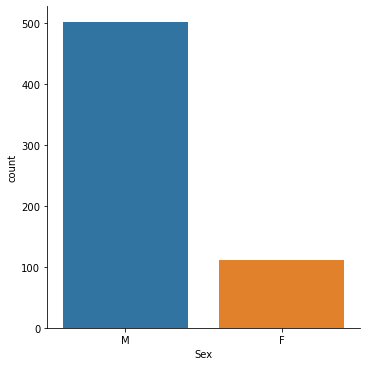

In [129]:
sns.catplot(x="Sex",kind="count",data=data)

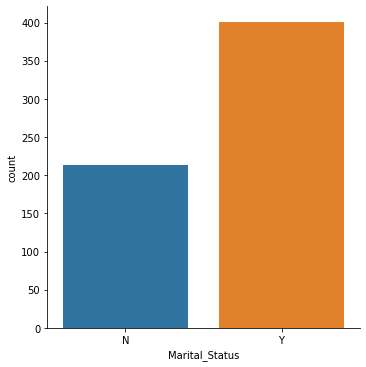

In [130]:
sns.catplot(x="Marital_Status",kind="count",data=data)

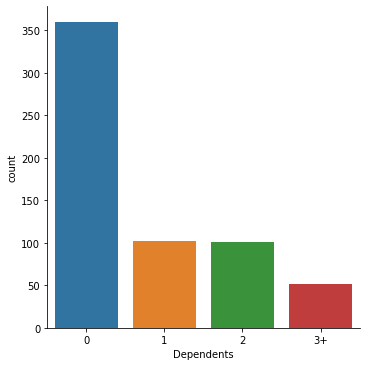

In [131]:
sns.catplot(x="Dependents",kind="count",data=data)

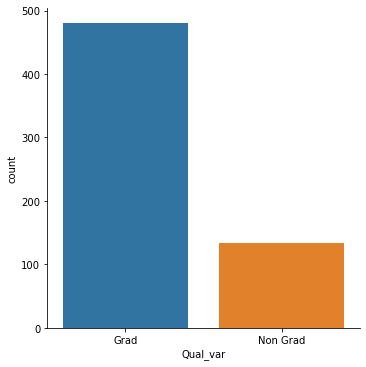

In [132]:
sns.catplot(x="Qual_var",kind="count",data=data)

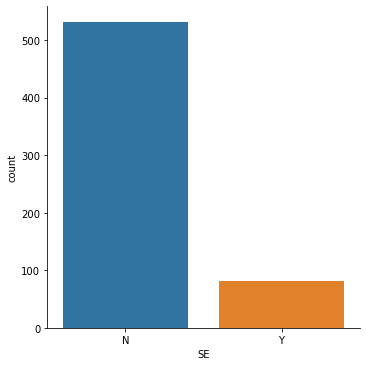

In [133]:
sns.catplot(x="SE",kind="count",data=data)

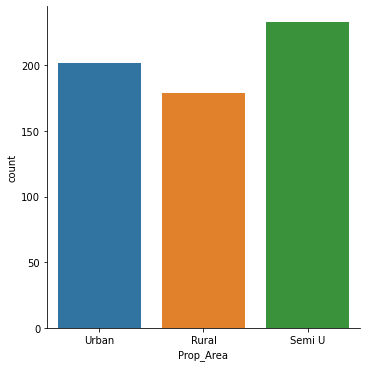

In [134]:
sns.catplot(x="Prop_Area",kind="count",data=data)

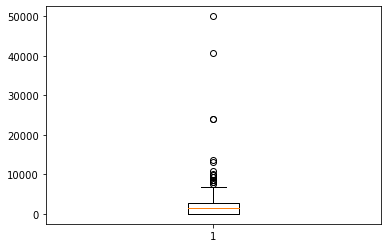

In [135]:
plt.boxplot(data['App_Income_2'])
plt.show()

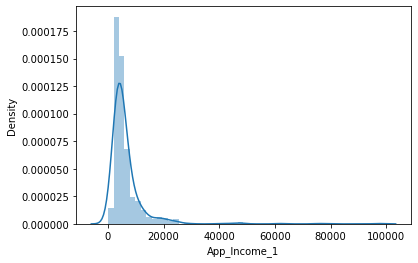

In [136]:
sns.distplot(data['App_Income_1'])
plt.show()

In [137]:
# df = data[['Sex', 'CPL_Status']].copy()
# pd.crosstab(df['Sex'], df['CPL_Status']).plot(kind='bar', stacked=True)
# ct=pd.crosstab(df['Sex'],df['CPL_Status'],dropna = True,normalize = 'columns').round(1)*100
# ct.plot.bar(stacked=True)
# plt.legend(title='CPL_Status')
# plt.show()

CPL_Status,N,Y
Sex,,
F,33.035714,66.964286
M,30.876494,69.123506


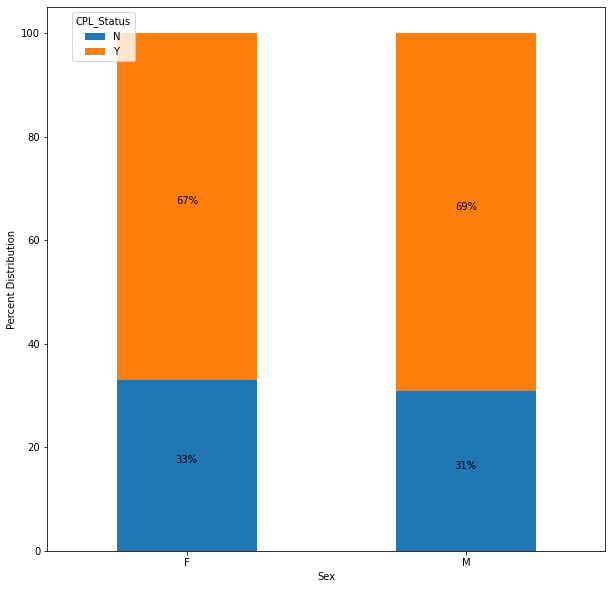

In [138]:
ax= pd.crosstab(data['Sex'], data['CPL_Status']).apply(lambda r: r/r.sum()*100, axis=1)
ax_1 = ax.plot.bar(figsize=(10,10),stacked=True, rot=0)
display(ax)
plt.legend(loc='upper center', bbox_to_anchor=(0.1, 1.0), title="CPL_Status")
plt.xlabel('Sex')
plt.ylabel('Percent Distribution')
for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, rec.get_y() + height / 2,"{:.0f}%".format(height),ha='center', va='bottom')
plt.show()

CPL_Status,N,Y
Marital_Status,,
N,37.089202,62.910798
Y,28.179551,71.820449


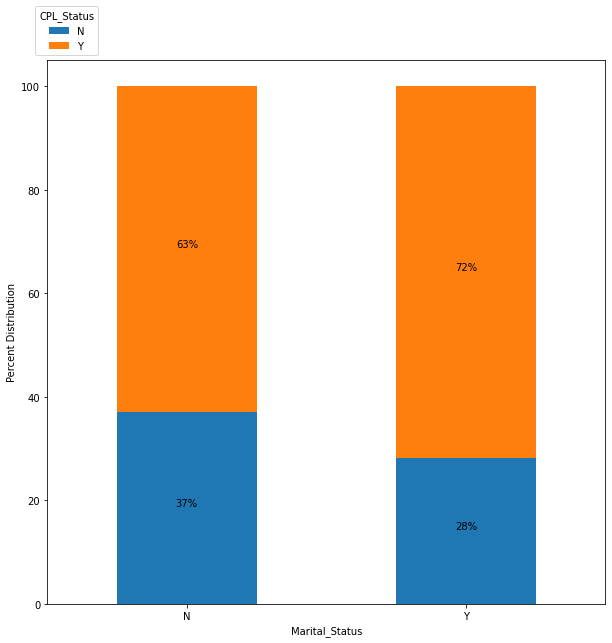

In [139]:
ax= pd.crosstab(data['Marital_Status'], data['CPL_Status']).apply(lambda r: r/r.sum()*100, axis=1)
ax_1 = ax.plot.bar(figsize=(10,10),stacked=True, rot=0)
display(ax)
plt.legend(loc='lower right', bbox_to_anchor=(0.1, 1.0), title="CPL_Status")
plt.xlabel('Marital_Status')
plt.ylabel('Percent Distribution')
for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, rec.get_y() + height / 2,"{:.0f}%".format(height),ha='center', va='bottom')
plt.show()

CPL_Status,N,Y
Qual_var,,
Grad,29.166667,70.833333
Non Grad,38.805970,61.194030


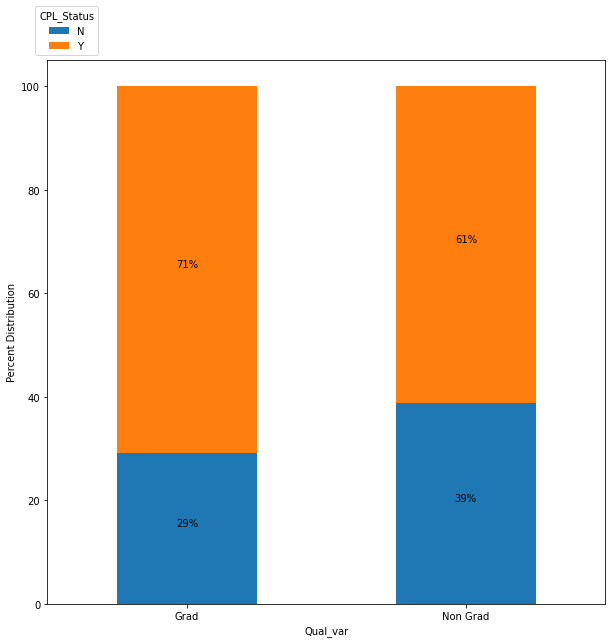

In [140]:
ax= pd.crosstab(data['Qual_var'], data['CPL_Status']).apply(lambda r: r/r.sum()*100, axis=1)
ax_1 = ax.plot.bar(figsize=(10,10),stacked=True, rot=0)
display(ax)
plt.legend(loc='lower right', bbox_to_anchor=(0.1, 1.0), title="CPL_Status")
plt.xlabel('Qual_var')
plt.ylabel('Percent Distribution')
for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, rec.get_y() + height / 2,"{:.0f}%".format(height),ha='center', va='bottom')
plt.show()

CPL_Status,N,Y
SE,,
N,31.203008,68.796992
Y,31.707317,68.292683


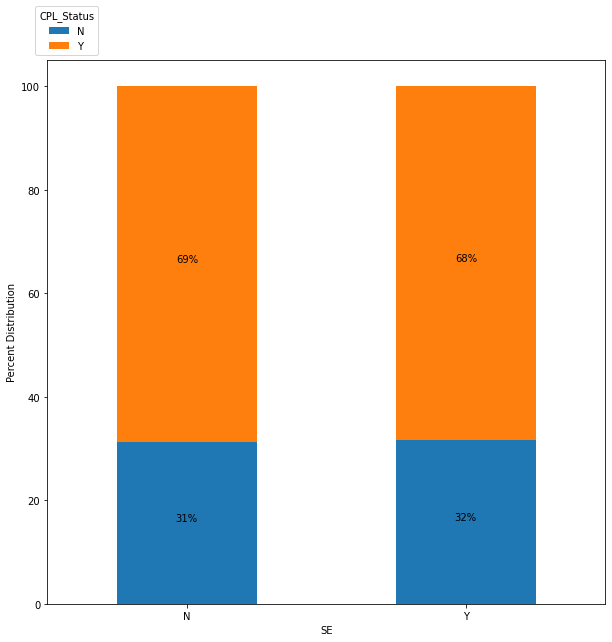

In [141]:
ax= pd.crosstab(data['SE'], data['CPL_Status']).apply(lambda r: r/r.sum()*100, axis=1)
ax_1 = ax.plot.bar(figsize=(10,10),stacked=True, rot=0)
display(ax)
plt.legend(loc='lower right', bbox_to_anchor=(0.1, 1.0), title="CPL_Status")
plt.xlabel('SE')
plt.ylabel('Percent Distribution')
for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, rec.get_y() + height / 2,"{:.0f}%".format(height),ha='center', va='bottom')
plt.show()

CPL_Status,N,Y
Dependents,,
0,31.388889,68.611111
1,35.294118,64.705882
2,24.752475,75.247525
3+,35.294118,64.705882


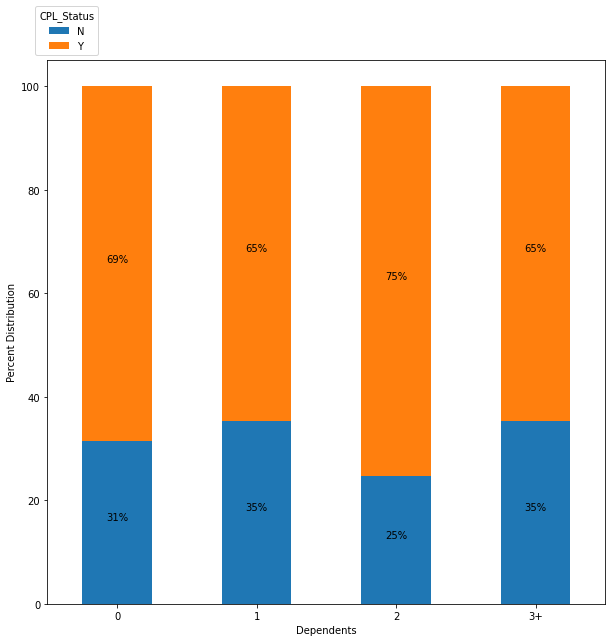

In [142]:
ax= pd.crosstab(data['Dependents'], data['CPL_Status']).apply(lambda r: r/r.sum()*100, axis=1)
ax_1 = ax.plot.bar(figsize=(10,10),stacked=True, rot=0)
display(ax)
plt.legend(loc='lower right', bbox_to_anchor=(0.1, 1.0), title="CPL_Status")
plt.xlabel('Dependents')
plt.ylabel('Percent Distribution')
for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, rec.get_y() + height / 2,"{:.0f}%".format(height),ha='center', va='bottom')
plt.show()

<AxesSubplot:>

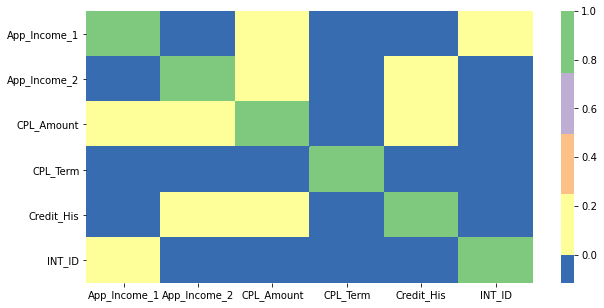

In [143]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data.corr(), center=0, cmap='Accent_r')

In [144]:
y=data[['CPL_Status']]
X=data.drop(['Loanapp_ID','first_name','last_name','email','address'],axis=1)
X = pd.get_dummies(X)
X_train,X_test,y_train,y_test=train_test_split(X,y.values.ravel(),test_size=0.25)

In [145]:
#LOGISTIC REGRESSION

model = LogisticRegression()
model.fit(X_train, y_train)
LogisticRegression()
pred_cv = model.predict(X_test)
accuracy_score(y_test,pred_cv)

0.6753246753246753

In [146]:
#LOGISTIC REGRESSION USING STRATIFIED k-FOLDS CROSS-VALIDATION

i=1
mean = 0
y=y.values.ravel()
kf = StratifiedKFold(n_splits=7,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
 print ('\n{} of kfold {} '.format(i,kf.n_splits))
 xtr,xvl = X.loc[train_index],X.loc[test_index]
 ytr,yvl = y[train_index],y[test_index]
 model = LogisticRegression(random_state=1)
 model.fit(xtr,ytr)
 pred_test=model.predict(xvl)
 score=accuracy_score(yvl,pred_test)
 mean+=score
 print ('accuracy_score',score)
 i+=1
 pred_test = model.predict(X_test)
 pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 7 
accuracy_score 0.6931818181818182

2 of kfold 7 
accuracy_score 0.6931818181818182

3 of kfold 7 
accuracy_score 0.6818181818181818

4 of kfold 7 
accuracy_score 0.6818181818181818

5 of kfold 7 
accuracy_score 0.6818181818181818

6 of kfold 7 
accuracy_score 0.6896551724137931

7 of kfold 7 
accuracy_score 0.6896551724137931

 Mean Validation Accuracy 0.6873040752351098


In [147]:
#SVM

model = SVC(kernel='rbf')
model.fit(X_train, y_train)
pred_cv = model.predict(X_test)
print("\n\nSVM - Stratified k-folds cross Validation")
tot_acc = 0
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_indices,test_indices in kf.split(X,y):
    print('\nIteration {} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_indices],X.loc[test_indices]     
    ytr,yvl = y[train_indices],y[test_indices]         
    model = SVC(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)     
    i+=1
    tot_acc = tot_acc + score
SVM_mean_acc = tot_acc/5
print("\nMean validation accuracy for SVM - Stratified k-folds cross Validation")
print("SVM   " +str(SVM_mean_acc))



SVM - Stratified k-folds cross Validation

Iteration 1 of kfold 5
accuracy_score 0.6910569105691057

Iteration 2 of kfold 5
accuracy_score 0.6910569105691057

Iteration 3 of kfold 5
accuracy_score 0.6829268292682927

Iteration 4 of kfold 5
accuracy_score 0.6829268292682927

Iteration 5 of kfold 5
accuracy_score 0.6885245901639344

Mean validation accuracy for SVM - Stratified k-folds cross Validation
SVM   0.6872984139677463


In [148]:
#KNN

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=31)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
# print(confusion_matrix(y_test,pred))
# print(classification_report(y_test,pred))
print(accuracy_score(y_test,pred))

0.6753246753246753


In [150]:
#Decision Tree

from sklearn import tree
i=1
mean = 0
kf = StratifiedKFold(n_splits=7,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    mean += score
    print ('accuracy_score',score)
    i+=1
    pred_test = model.predict(X_test)
    pred = model.predict_proba(xvl)[:,1]
print ('\n Decision Tree Mean :: Validation Accuracy',mean/(i-1))


1 of kfold 7 
accuracy_score 1.0

2 of kfold 7 
accuracy_score 1.0

3 of kfold 7 
accuracy_score 1.0

4 of kfold 7 
accuracy_score 1.0

5 of kfold 7 
accuracy_score 1.0

6 of kfold 7 
accuracy_score 1.0

7 of kfold 7 
accuracy_score 1.0

 Decision Tree Mean :: Validation Accuracy 1.0


In [151]:
#RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
i=1
mean = 0
kf = StratifiedKFold(n_splits=7,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
 print ('\n{} of kfold {}'.format(i,kf.n_splits))
 xtr,xvl = X.loc[train_index],X.loc[test_index]
 ytr,yvl = y[train_index],y[test_index]
 model = RandomForestClassifier(random_state=1, max_depth=10)
 model.fit(xtr,ytr)
 pred_test=model.predict(xvl)
 score=accuracy_score(yvl,pred_test)
 mean += score
 print ('accuracy_score',score)
 i+=1
 pred_test = model.predict(X_test)
 pred = model.predict_proba(xvl)[:,1]
print ('\n Random Forest::  Mean Validation Accuracy',mean/(i-1))


1 of kfold 7
accuracy_score 0.9431818181818182

2 of kfold 7
accuracy_score 1.0

3 of kfold 7
accuracy_score 1.0

4 of kfold 7
accuracy_score 1.0

5 of kfold 7
accuracy_score 1.0

6 of kfold 7
accuracy_score 1.0

7 of kfold 7
accuracy_score 1.0

 Random Forest::  Mean Validation Accuracy 0.9918831168831169


In [152]:
#XGB

from xgboost import XGBClassifier
i=1 
mean = 0
kf = StratifiedKFold(n_splits=7,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y): 
 print('\n{} of kfold {}'.format(i,kf.n_splits)) 
 xtr,xvl = X.loc[train_index],X.loc[test_index] 
 ytr,yvl = y[train_index],y[test_index] 
 model = XGBClassifier(n_estimators=50, max_depth=4) 
 model.fit(xtr, ytr) 
 pred_test = model.predict(xvl) 
 score = accuracy_score(yvl,pred_test) 
 mean += score
 print ('accuracy_score',score)
 i+=1
 pred_test = model.predict(X_test)
 pred = model.predict_proba(xvl)[:,1]
print ('\n XGB:: Mean Validation Accuracy',mean/(i-1))


1 of kfold 7
[17:25:47] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy_score 1.0

2 of kfold 7
[17:25:48] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy_score 1.0

3 of kfold 7
[17:25:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy_score 1.0

4 of kfold 7
[17:25:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binar

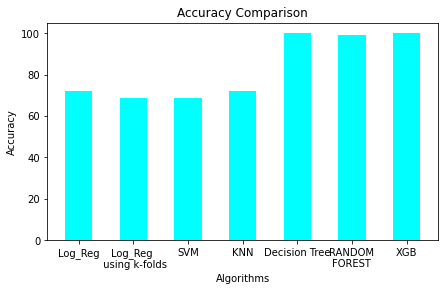

In [153]:
data = {'Log_Reg':0.7207792207792207*100, 'Log_Reg \n using k-folds':0.6873040752351098*100,'SVM':0.6872984139677463*100,  'KNN':0.7207792207792207*100,
        'Decision Tree':1.0*100,'RANDOM\nFOREST':0.9918831168831169*100,'XGB':1.0*100}
Algorithms = list(data.keys())
Accuracy = list(data.values())
fig = plt.figure(figsize = (7, 4))
plt.bar(Algorithms, Accuracy, color ='cyan',width = 0.5)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison")
plt.show()

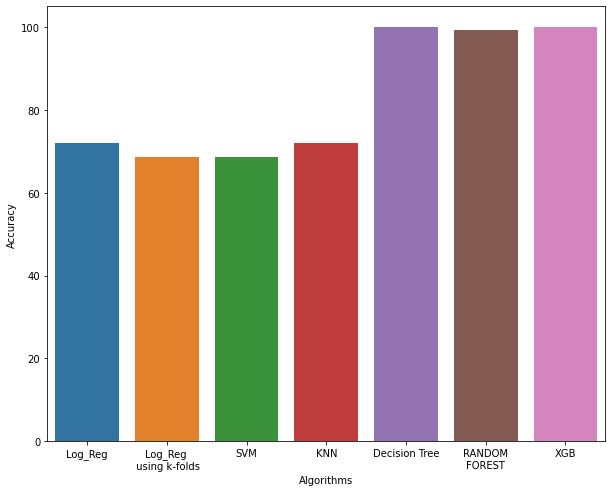

In [154]:
fig, ax = plt.subplots(figsize=(10, 8))
ax=sns.barplot(Algorithms, Accuracy, ax=ax)
ax.set(xlabel='Algorithms', ylabel='Accuracy')
plt.show()